In [1]:
import pandas as pd

def load_data(filepath):
    """
    Charge les données du fichier CSV.
    """
    return pd.read_csv(filepath)

# Utilisation de la fonction
file_path = 'data/1v1.csv'  # Assurez-vous que ce chemin est correct
data = load_data(file_path)


In [46]:
def get_win_rates(data, champion, min_matches=50):
    """
    Calcule le taux de victoire des adversaires contre un champion donné.
    """
    # Filtrer les matchs où le champion choisi est soit champ1 soit champ2
    matches = data[(data['champ1'] == champion) | (data['champ2'] == champion)]
    
    # Calculer les taux de victoire
    win_rates = {}
    for _, row in matches.iterrows():
        if row['champ1'] == champion:
            opponent = row['champ2']
            win = 1 if row['win'] == 0 else 0
        else:
            opponent = row['champ1']
            win = row['win']

        if opponent not in win_rates:
            win_rates[opponent] = {'wins': 0, 'total': 0}
        
        win_rates[opponent]['wins'] += win
        win_rates[opponent]['total'] += 1

    # Filtrer pour garder seulement les champions avec un nombre minimum de matchs
    win_rates = {champ: stats for champ, stats in win_rates.items() if stats['total'] >= min_matches}

    # Calculer le pourcentage de victoire
    for champ in win_rates:
        win_rates[champ]['win_rate'] = win_rates[champ]['wins'] / win_rates[champ]['total']

    return win_rates


In [47]:
# Demander à l'utilisateur de saisir un champion
champion = input("Entrez le nom d'un champion : ").capitalize()

In [48]:
def top_counter_champions(data, champion, top_n=5):
    """
    Retourne les champions ayant les meilleurs taux de victoire contre le champion choisi.
    """
    win_rates = get_win_rates(data, champion)
    sorted_champs = sorted(win_rates.items(), key=lambda x: x[1]['win_rate'], reverse=True)
    return sorted_champs[:top_n]

In [49]:
# Trouver et afficher les 5 meilleurs champions contre le champion choisi
top_counters = top_counter_champions(data, champion)
print(f"Les 5 meilleurs champions contre {champion} sont :")
for champ, stats in top_counters:
    print(f"{champ} avec un taux de victoire de {stats['win_rate'] * 100:.2f}%")

Les 5 meilleurs champions contre Jinx sont :
Heimerdinger avec un taux de victoire de 58.44%
Yasuo avec un taux de victoire de 57.31%
Ziggs avec un taux de victoire de 57.12%
Karthus avec un taux de victoire de 55.91%
Cassiopeia avec un taux de victoire de 54.76%


In [1]:
import pandas as pd

# Charger les données des champions à partir du fichier CSV
data_champions = pd.read_csv('Champions_LoL_Reorganized.csv')

# Ensuite, exécutez le code précédent pour calculer les moyennes
top_counters = ['Heimerdinger', 'Yasuo', 'Ziggs', 'Karthus', 'Cassiopeia']
top_counters_data = data_champions[data_champions['Nom du Champion'].isin(top_counters)]
mean_ratings = top_counters_data.mean(numeric_only=True)

mean_ratings


Id             88.2
Ad              1.6
Ap              7.2
Early           2.2
MidGame         7.2
Lategame        8.6
Snowball        5.8
Escarmouche     4.4
Teamfight       6.2
CC              3.6
Burst           6.8
Dps             8.0
Range           6.2
Mobilité        2.4
SplitPush       4.6
dtype: float64

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

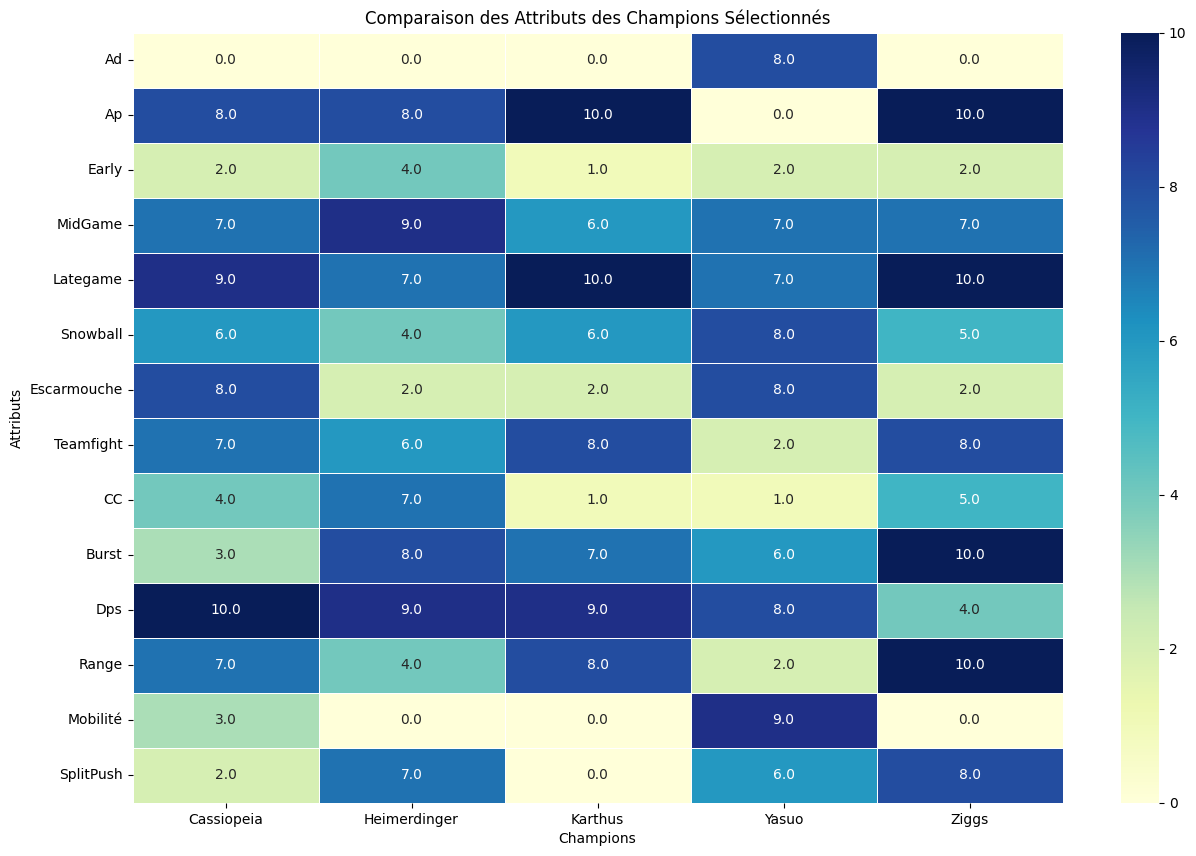

In [12]:
# Filtrer les données pour ne garder que les champions sélectionnés
selected_champions = data[data['Nom du Champion'].isin(top_counters)]

# Liste des attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']
selected_attributes = selected_champions.set_index('Nom du Champion')[attributes].T

# Créer un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(selected_attributes, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Comparaison des Attributs des Champions Sélectionnés')
plt.ylabel('Attributs')
plt.xlabel('Champions')
plt.show()

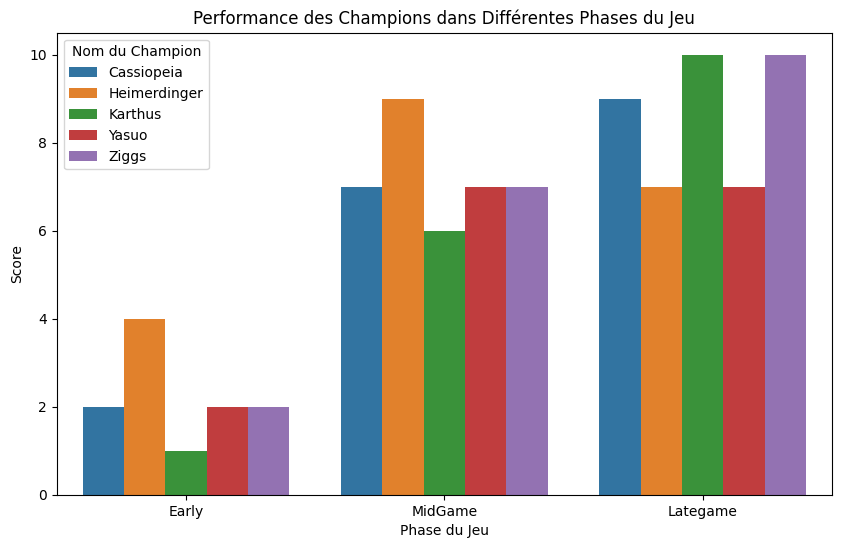

In [14]:
plt.figure(figsize=(10, 6))
phases = ['Early', 'MidGame', 'Lategame']
sns.barplot(data=selected_champions.melt(id_vars='Nom du Champion', value_vars=phases), x='variable', y='value', hue='Nom du Champion')
plt.title('Performance des Champions dans Différentes Phases du Jeu')
plt.xlabel('Phase du Jeu')
plt.ylabel('Score')
plt.show()


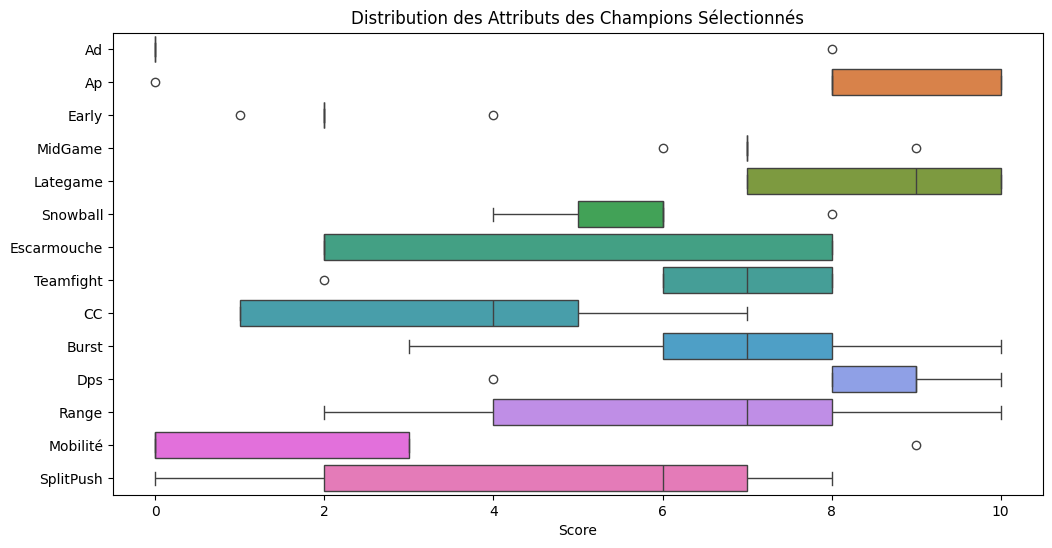

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_champions[attributes], orient='h')
plt.title('Distribution des Attributs des Champions Sélectionnés')
plt.xlabel('Score')
plt.show()


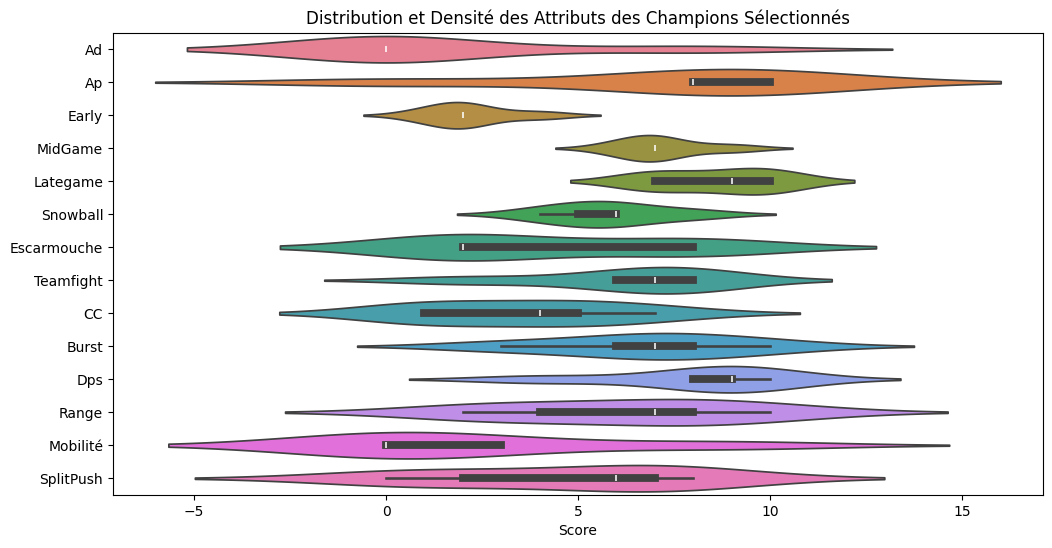

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=selected_champions[attributes], orient='h')
plt.title('Distribution et Densité des Attributs des Champions Sélectionnés')
plt.xlabel('Score')
plt.show()


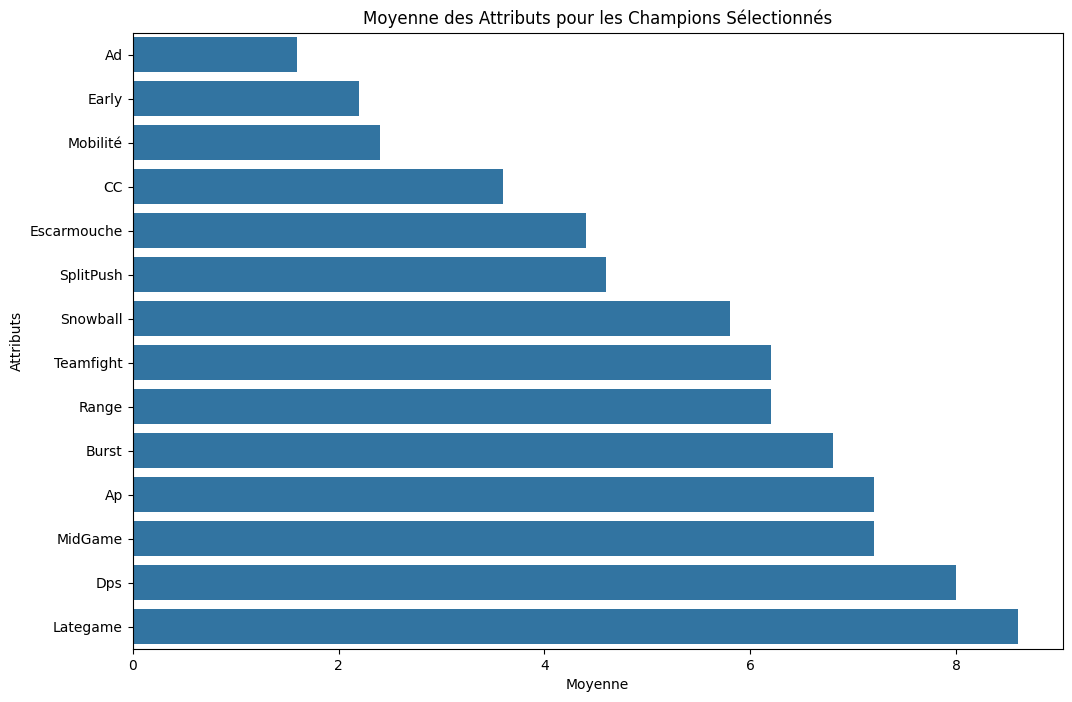

In [18]:
plt.figure(figsize=(12, 8))
mean_attributes = selected_champions[attributes].mean().sort_values()
sns.barplot(x=mean_attributes.values, y=mean_attributes.index)
plt.title('Moyenne des Attributs pour les Champions Sélectionnés')
plt.xlabel('Moyenne')
plt.ylabel('Attributs')
plt.show()


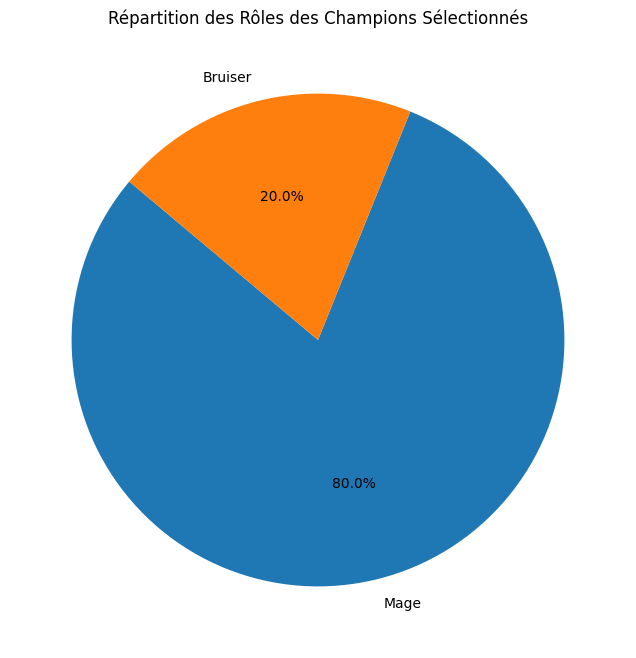

In [20]:
plt.figure(figsize=(8, 8))
role_counts = selected_champions['Rôle principal'].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Rôles des Champions Sélectionnés')
plt.show()



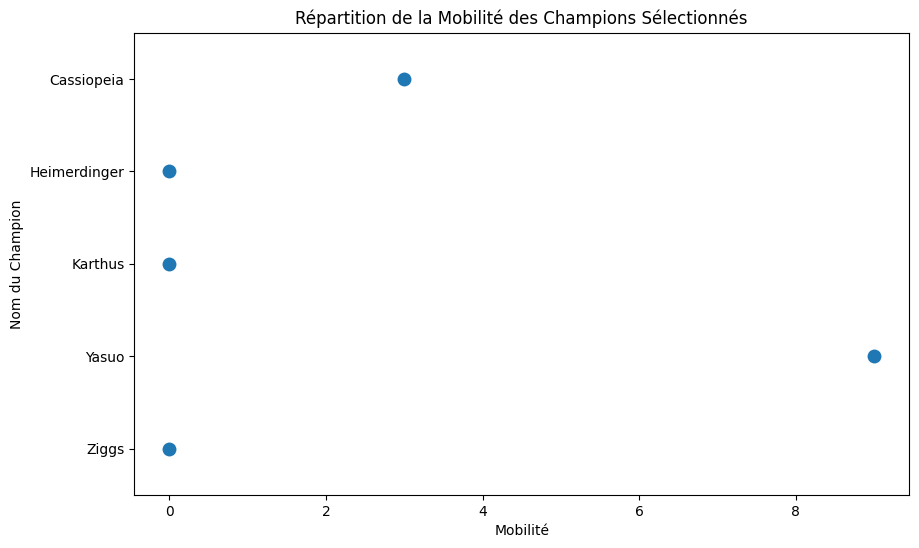

In [21]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=selected_champions, x='Mobilité', y='Nom du Champion', jitter=True, size=10)
plt.title('Répartition de la Mobilité des Champions Sélectionnés')
plt.xlabel('Mobilité')
plt.show()


C:\Users\Pinta\AppData\Local\Temp\ipykernel_42224\1052501341.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
C:\Users\Pinta\AppData\Local\Temp\ipykernel_42224\1052501341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')


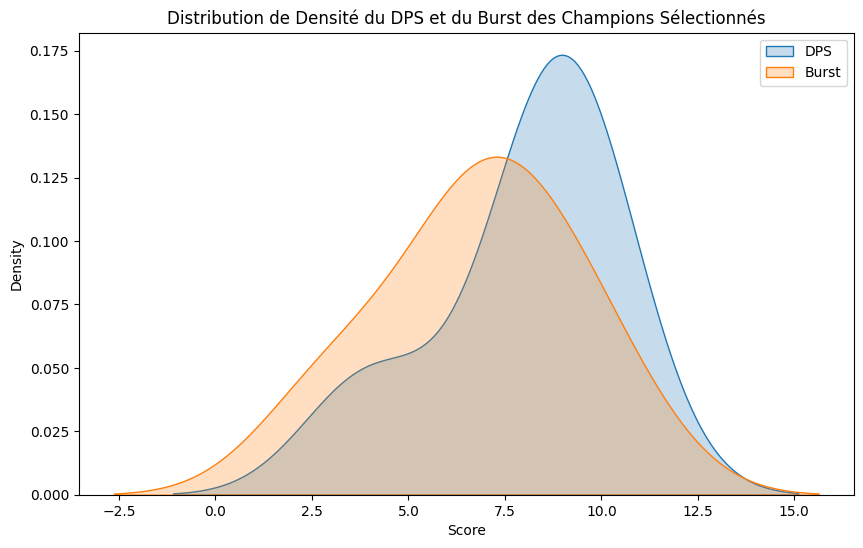

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')
plt.title('Distribution de Densité du DPS et du Burst des Champions Sélectionnés')
plt.xlabel('Score')
plt.legend()
plt.show()